In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# %matplotlib wx
%matplotlib inline

In [81]:
def linear(x, a, b):
    return a * x + b

def quadratic(x, a, b, c):
    return a * x * x + b * x + c

def inverse_quadratic(x, a, b, c):
    return (-b + np.sqrt(b**2 - 4*a*(c-x))) / (2*a)

def show_fit(actual, predicted):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(actual, predicted, 'b.')
    return actual - predicted

def fit_and_plot(x, y, fit_fn):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y, 'b.')
    popt, pcov = curve_fit(fit_fn, x, y)
    xfine = np.linspace(min(x), max(x), 100)
    ax.plot(xfine, fit_fn(xfine, *popt), 'r-')
    return popt, pcov

def fit_and_plot_semilogy(x, y, fit_fn):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y, 'b.')
    popt, pcov = curve_fit(fit_fn, x, y)
    xfine = np.linspace(min(x), max(x), 100)
    ax.semilogy(xfine, fit_fn(xfine, *popt), 'r-')
    return popt, pcov

In [120]:
dataset = pd.read_csv("/Users/r/Projects/ParticleZen/zzen/calibration/20170803a.csv", skipinitialspace = True)
# Vx fields were reported 1000x their actual values.  Fix now...
dataset['Vadc0'] = dataset['Vadc0'] / 1000.0
dataset['Vadc1'] = dataset['Vadc1'] / 1000.0
dataset['Vadc2'] = dataset['Vadc2'] / 1000.0
dataset['Vadc3'] = dataset['Vadc3'] / 1000.0
# fix some negative values
dataset.loc[0,'Vadc3'] = 0.0
dataset.loc[0,'R3'] = 0.0
# While we're at it, let's work using log10(R) rather than R...
dataset.loc[0,'R'] = 0.01  # realistically smallest resistance
dataset['Rlog'] = np.log10(dataset['R'])
dataset

,R,Vadc0,R0,Vadc1,R1,Vadc2,R2,Vadc3,R3,Rlog
0,0.01,0.01160,2.43,0.00220,1.67,0.00012,1.32,0.00000,0.00,-2.0
1,10.00,0.04993,10.88,0.01074,8.21,0.00098,10.56,0.00000,0.00,1.0
2,100.00,0.29395,86.31,0.08142,67.06,0.00964,105.17,0.00085,85.78,2.0
3,1000.00,0.80273,851.18,0.46582,661.01,0.08960,1063.09,0.00989,1001.75,3.0
4,10000.00,0.97363,8399.88,0.89539,6614.73,0.49451,10580.85,0.09009,9941.85,4.0
5,100000.00,0.99512,83460.09,0.98633,66520.55,0.90613,105769.79,0.49951,101283.46,5.0
6,1000000.00,0.99731,403688.01,0.99695,712422.47,0.99268,1833117.80,0.92798,1521066.72,6.0


Define a model that maps Vx to R

In [117]:
def model_a(vadc, vdrv, rdrv):
    r = rdrv * vadc / (vdrv - vadc)
    return r
def model_b(vadc, vdrv, rdrvlog):
    r = np.power(10.0, rdrvlog) * vadc / (vdrv - vadc)
    return r
def model_c(vadc, rdrvlog):  # fix vdrv at 1.0.  better or worse?
    vdrv = 1.0
    r = np.power(10.0, rdrvlog) * vadc / (vdrv - vadc)
    return r

In [102]:
popt0a, _ = curve_fit(model_a, dataset['Vadc0'], dataset['R'])
popt1a, _ = curve_fit(model_a, dataset['Vadc1'], dataset['R'])
popt2a, _ = curve_fit(model_a, dataset['Vadc2'], dataset['R'])
popt3a, _ = curve_fit(model_a, dataset['Vadc3'], dataset['R'])
[popt0a, popt1a, popt2a, popt3a]

[array([   0.99755394,  244.59974498]),
 array([  9.98143468e-01,   1.19711963e+03]),
 array([  1.00332239e+00,   1.07208761e+04]),
 array([ 0.49951027,  0.05467231])]

In [114]:
popt0b, _ = curve_fit(model_b, dataset['Vadc0'], dataset['R'])
popt1b, _ = curve_fit(model_b, dataset['Vadc1'], dataset['R'])
popt2b, _ = curve_fit(model_b, dataset['Vadc2'], dataset['R'])
popt3b, _ = curve_fit(model_b, dataset['Vadc3'], dataset['R'])
[popt0b, popt1b, popt2b, popt3b]

/Users/r/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in power


[array([ 0.99755394,  2.388456  ]),
 array([ 0.99814347,  3.07813755]),
 array([ 1.00332239,  4.03023028]),
 array([ 1.02572309,  5.02254751])]

In [118]:
popt0c, _ = curve_fit(model_c, dataset['Vadc0'], dataset['R'])
popt1c, _ = curve_fit(model_c, dataset['Vadc1'], dataset['R'])
popt2c, _ = curve_fit(model_c, dataset['Vadc2'], dataset['R'])
popt3c, _ = curve_fit(model_c, dataset['Vadc3'], dataset['R'])
[popt0c, popt1c, popt2c, popt3c]

[array([ 3.33647037]),
 array([ 3.47427232]),
 array([ 3.86859601]),
 array([ 4.89067534])]

/Users/r/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in power


(array([ 1.02572309,  5.02254751]),
 array([[  6.12494230e-09,   2.69926714e-08],
        [  2.69926714e-08,   1.19752306e-07]]))

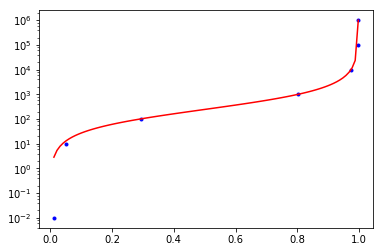

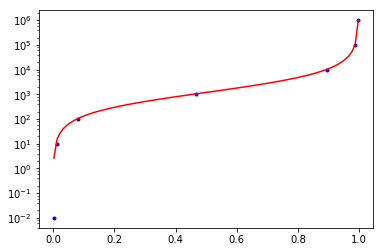

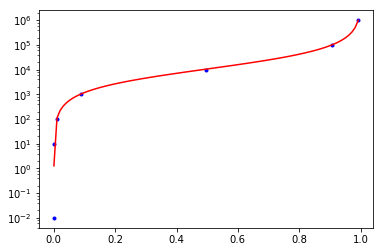

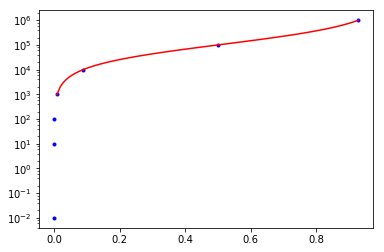

In [116]:
fit_and_plot_semilogy(dataset['Vadc0'], dataset['R'], model_b)
fit_and_plot_semilogy(dataset['Vadc1'], dataset['R'], model_b)
fit_and_plot_semilogy(dataset['Vadc2'], dataset['R'], model_b)
fit_and_plot_semilogy(dataset['Vadc3'], dataset['R'], model_b)

How well does the model predict resistance with Vdrv fixed at 1.0?  (Answer: not so well...)

(array([ 4.89067534]), array([[  1.58948743e-05]]))

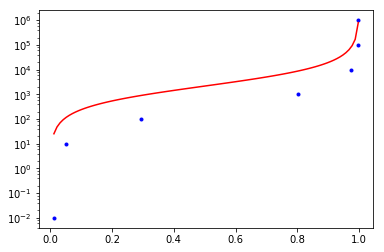

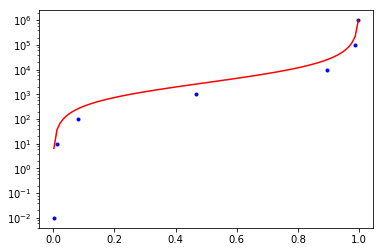

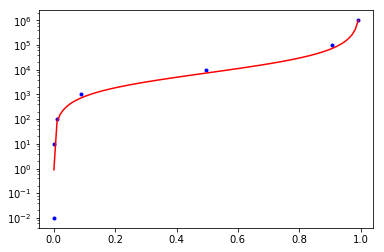

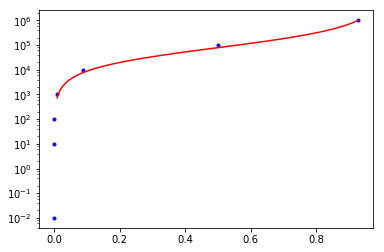

In [119]:
fit_and_plot_semilogy(dataset['Vadc0'], dataset['R'], model_c)
fit_and_plot_semilogy(dataset['Vadc1'], dataset['R'], model_c)
fit_and_plot_semilogy(dataset['Vadc2'], dataset['R'], model_c)
fit_and_plot_semilogy(dataset['Vadc3'], dataset['R'], model_c)

In [121]:
np.linspace(1.5, 6, 4)

array([ 1.5,  3. ,  4.5,  6. ])

In [123]:
np.power(10.0, np.linspace(1.5, 6, 4))

array([  3.16227766e+01,   1.00000000e+03,   3.16227766e+04,
         1.00000000e+06])

Can we avoid the internal overflow by working with log10(R)?

In [124]:
def model_d(vadc, vdrv, rdrvlog):
    r = np.power(10.0, rdrvlog) * vadc / (vdrv - vadc)
    return np.log10(r)

In [125]:
popt0d, _ = curve_fit(model_d, dataset['Vadc0'], dataset['Rlog'])
popt1d, _ = curve_fit(model_d, dataset['Vadc1'], dataset['Rlog'])
popt2d, _ = curve_fit(model_d, dataset['Vadc2'], dataset['Rlog'])
popt3d, _ = curve_fit(model_d, dataset['Vadc3'], dataset['Rlog'])
[popt0d, popt1d, popt2d, popt3d]

/Users/r/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/Users/r/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


[array([ 0.9973955 ,  1.95015336]),
 array([ 0.99736447,  2.6358719 ]),
 array([ 0.99700299,  3.65565323]),
 array([ 1.,  1.])]

Hm - that doesn't work either.  But model_b is good enough.